In [1]:
import pandas as pd
import pandasql as ps

In [2]:
import os
import pickle

In [3]:
os.listdir('../data')

['.DS_Store', 'merged_dataset.csv', 'crime_1.csv', 'backup', 'education_1.csv']

In [4]:
data = '../data'

In [5]:
crime = pd.read_csv(f'{data}/crime_1.csv')
education = pd.read_csv(f'{data}/education_1.csv')

# merged = pd.read_csv(f'{data}/CrimeAndEducation.csv')

In [6]:
merged = pd.merge(crime,education,on=['Year','Region'],how='outer')

In [7]:
merged_2 = merged[['Region','Year','Series_x','Value_x','Series_y','Value_y']]

In [8]:
merged_final = merged_2[merged_2['Series_y'].isin([i for i in list(merged_2['Series_y'].unique()) if 'Gross' in str(i)])]

In [22]:
co_df = merged_final[(merged_final['Region'].isin(co)) & (merged_final['Series_x']=='Intentional homicide rates per 100,000') |
             (merged_final['Series_y']=='Gross enrollment ratio - Tertiary (male)')].dropna()



In [23]:
from numpy import cov


In [24]:
from scipy.stats import pearsonr


In [25]:
pearsonr(co_df['Value_x'],co_df['Value_y'])[0]

0.097773391128328

In [21]:
df = education[education['Series']=='Gross Enrolment']
co = pd.DataFrame(df['Region'].value_counts()).reset_index()
co = list(co[co['Region']>3]['index'])
df[df['Region'].isin(co)].groupby('Region').mean().sort_values(by='Value',ascending=False)

,Num,Year,Value
Region,,,


In [16]:
df = crime[(crime['Year']>=2005) & (crime['Series']=='Intentional homicide rates per 100,000')]
co = pd.DataFrame(df['Region'].value_counts()).reset_index()
co = list(co[co['Region']>3]['index'])

df[df['Region'].isin(co)].groupby('Region').mean().sort_values(by='Value',ascending=False)

,Num,Year,Value,Footnotes
Region,,,,
El Salvador,222.0,2011.750000,73.889100,NaN
Jamaica,388.0,2011.200000,54.751300,NaN
Honduras,340.0,2012.000000,53.641900,NaN
Saint Kitts and Nevis,659.0,2009.500000,41.193950,NaN
Belize,84.0,2012.285714,34.628557,NaN
...,...,...,...,...
Brunei Darussalam,96.0,2008.500000,0.527450,NaN
Qatar,634.0,2008.750000,0.440925,NaN
"China, Macao SAR",446.0,2012.000000,0.421100,NaN


In [19]:
df = crime[(crime['Year']>=2005) & (crime['Series']=='Intentional homicide rates per 100,000')]
co = pd.DataFrame(df['Region'].value_counts()).reset_index()
co = list(co[co['Region']>3]['index'])

In [26]:
crime.append(education).to_csv("test.csv")

In [36]:
education[(education['Region']=='Canada') & (education['Series']=='Gross enrollment ratio - Tertiary (male)')]

,Num,Region,Year,Series,Value,Footnotes,Source
1988,124,Canada,2002,Gross enrollment ratio - Tertiary (male),50.6549,Estimate.,"United Nations Educational, Scientific and Cul..."
2003,124,Canada,2010,Gross enrollment ratio - Tertiary (male),52.0463,Estimate.,"United Nations Educational, Scientific and Cul..."
2012,124,Canada,2014,Gross enrollment ratio - Tertiary (male),56.3705,Estimate.,"United Nations Educational, Scientific and Cul..."
2021,124,Canada,2015,Gross enrollment ratio - Tertiary (male),55.5311,Estimate.,"United Nations Educational, Scientific and Cul..."
2030,124,Canada,2017,Gross enrollment ratio - Tertiary (male),59.0687,Estimate.,"United Nations Educational, Scientific and Cul..."


In [15]:
co = pd.DataFrame(df['Region'].value_counts()).reset_index()
co[co['Region']=='Singapore']

,index,Region


In [114]:
test_df = crime[(crime['Region'].isin(co)) & (crime['Year']>=2005) & (crime['Series']=='Intentional homicide rates per 100,000')]



In [95]:
ci = []
for i in list(test_df['Region'].unique()):
    ci.append((i,(test_df[test_df['Region']==i].iloc[-1]['Value'] /test_df[test_df['Region']==i].iloc[0]['Value'])))
    
ci

/var/folders/hh/p7rw65qd6q1d4zrlxyvty5lh0000gn/T/ipykernel_82863/1722389329.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  ci.append((i,(test_df[test_df['Region']==i].iloc[-1]['Value'] /test_df[test_df['Region']==i].iloc[0]['Value'])))


[('Albania', 0.40308679094006816),
 ('Anguilla', inf),
 ('Antigua and Barbuda', 3.003530018736253),
 ('Argentina', 0.9218423753406235),
 ('Armenia', 1.2218452839886917),
 ('Australia', 0.6433190494740942),
 ('Austria', 1.2130521167660093),
 ('Azerbaijan', 0.9079427199146134),
 ('Bahamas', 1.9964516632828362),
 ('Bahrain', 1.1644809957768394),
 ('Bangladesh', 0.8602670795432553),
 ('Barbados', 0.9986660441539384),
 ('Belarus', 0.2943508194441225),
 ('Belgium', 0.806576310012408),
 ('Belize', 1.3239925161344575),
 ('Bermuda', 2.6517194216490814),
 ('Bolivia (Plurin. State of)', 1.2010429744084983),
 ('Bosnia and Herzegovina', 0.674089613253725),
 ('Brazil', 1.3148391388898366),
 ('Brunei Darussalam', 0.902701715954728),
 ('Bulgaria', 0.560182323856613),
 ('Cabo Verde', 0.743993685872139),
 ('Cameroon', 0.28263968072976053),
 ('Canada', 0.8703739585351675),
 ('Cayman Islands', 1.3492939244663382),
 ('Chile', 1.1849188065404281),
 ('China, Hong Kong SAR', 0.6541218637992832),
 ('China, Mac

In [98]:
sorted(ci,key = lambda a:-a[1])

[('Anguilla', inf),
 ('Liechtenstein', inf),
 ('Egypt', 3.6945891203703702),
 ('Antigua and Barbuda', 3.003530018736253),
 ('Mexico', 2.7469815151191366),
 ('Bermuda', 2.6517194216490814),
 ('Dominica', 2.3457436015068773),
 ('Saint Kitts and Nevis', 2.113376281112738),
 ('Malta', 2.0790085988872025),
 ('Bahamas', 1.9964516632828362),
 ('Kenya', 1.659670114243223),
 ('Myanmar', 1.6354091238233166),
 ('Costa Rica', 1.5583656343145158),
 ('Hungary', 1.5296432964329645),
 ('Saint Vincent & Grenadines', 1.5265171928329428),
 ('Uruguay', 1.4447882793104652),
 ('Yemen', 1.440933656751351),
 ('Morocco', 1.3889213585297746),
 ('Cayman Islands', 1.3492939244663382),
 ('Belize', 1.3239925161344575),
 ('Brazil', 1.3148391388898366),
 ('Uganda', 1.2778012309196347),
 ('Denmark', 1.2669803600654663),
 ('Sweden', 1.242404442992486),
 ('Armenia', 1.2218452839886917),
 ('Austria', 1.2130521167660093),
 ('Bolivia (Plurin. State of)', 1.2010429744084983),
 ('Chile', 1.1849188065404281),
 ('Jordan', 1.16

In [115]:
test_df[test_df['Region']=='Georgia']

,Num,Region,Year,Series,Value,Footnotes,Source
1395,268,Georgia,2005,"Intentional homicide rates per 100,000",9.5721,NaN,United Nations Office on Drugs and Crime (UNOD...
1402,268,Georgia,2010,"Intentional homicide rates per 100,000",4.5620,NaN,United Nations Office on Drugs and Crime (UNOD...
1410,268,Georgia,2014,"Intentional homicide rates per 100,000",2.6764,NaN,United Nations Office on Drugs and Crime (UNOD...
1417,268,Georgia,2016,"Intentional homicide rates per 100,000",0.9712,NaN,United Nations Office on Drugs and Crime (UNOD...


In [128]:
df = education[(education['Year']>=2005) & (education['Series']=='Gross enrollment ratio - Tertiary (female)')]
co = pd.DataFrame(df['Region'].value_counts()).reset_index()
co = list(co[co['Region']>3]['index'])

df[df['Region'].isin(co)].groupby('Region').mean().sort_values(by='Value',ascending=False)

test_df = education[(education['Region'].isin(co)) & (education['Year']>=2005) & (education['Series']=='Gross enrollment ratio - Tertiary (female)')]



In [129]:
ci = []
for i in list(test_df['Region'].unique()):
    ci.append((i,1-(test_df[test_df['Region']==i].iloc[-1]['Value'] /test_df[test_df['Region']==i].iloc[0]['Value'])))
    
ci

[('Total, all countries or areas', -0.627914155932149),
 ('Northern Africa', -0.620252020942949),
 ('Sub-Saharan Africa', -0.6178209903823897),
 ('Northern America', -0.07335001732237045),
 ('Latin America & the Caribbean', -0.7233851762561374),
 ('Eastern Asia', -1.5405945495045419),
 ('South-eastern Asia', -0.7943223991522566),
 ('Southern Asia', -1.9309462915601023),
 ('Western Asia', -1.1972003686431796),
 ('Europe', -0.11507857498902108),
 ('Oceania', -0.21888070020989892),
 ('Albania', -1.4708359993418765),
 ('Algeria', -1.7439845636812041),
 ('Angola', -1.544182266899416),
 ('Argentina', -0.49464213546048996),
 ('Armenia', -0.3633680948484479),
 ('Aruba', 0.4449878930729071),
 ('Azerbaijan', -0.5500563780250987),
 ('Bahrain', -0.701775510101694),
 ('Bangladesh', -2.8615961800818557),
 ('Belarus', -0.2133443236670287),
 ('Belgium', -0.3319777372047823),
 ('Belize', -0.5515212589448397),
 ('Benin', -0.03890465854065783),
 ('Bermuda', 0.4305450585731617),
 ('Bhutan', -3.13519645526

In [133]:
sorted(ci,key = lambda a:-a[1])

[('Aruba', 0.4449878930729071),
 ('Bermuda', 0.4305450585731617),
 ('Cuba', 0.3500949225966745),
 ('Hungary', 0.3042056370274676),
 ('Mali', 0.25305870468066005),
 ('Sweden', 0.17872498821768323),
 ('Lithuania', 0.13879223199840884),
 ('Finland', 0.04720512840925384),
 ('Italy', 0.04329911801808917),
 ('Jordan', 0.040778139405948766),
 ('Saint Lucia', 0.01788098266564342),
 ('Kyrgyzstan', 0.01578603769611453),
 ('Estonia', 0.011340656779043612),
 ('Slovenia', 0.004667342193650836),
 ('Uzbekistan', -0.001225891805945123),
 ('Denmark', -0.001992688834303813),
 ('United Kingdom', -0.008266180306784499),
 ('Iceland', -0.02086295233966262),
 ('Norway', -0.037617179247593224),
 ('Benin', -0.03890465854065783),
 ('Luxembourg', -0.04811073427519208),
 ('Russian Federation', -0.058394576696326306),
 ('Republic of Moldova', -0.0655897036681381),
 ('Romania', -0.06729545581437435),
 ('United States of America', -0.0716575866003013),
 ('Northern America', -0.07335001732237045),
 ('Portugal', -0.07

In [132]:
test_df[test_df['Region']=='Aruba']

,Num,Region,Year,Series,Value,Footnotes,Source
870,533,Aruba,2005,Gross enrollment ratio - Tertiary (female),37.2927,NaN,"United Nations Educational, Scientific and Cul..."
879,533,Aruba,2010,Gross enrollment ratio - Tertiary (female),43.9354,NaN,"United Nations Educational, Scientific and Cul..."
888,533,Aruba,2012,Gross enrollment ratio - Tertiary (female),45.5852,NaN,"United Nations Educational, Scientific and Cul..."
894,533,Aruba,2014,Gross enrollment ratio - Tertiary (female),23.0369,NaN,"United Nations Educational, Scientific and Cul..."
897,533,Aruba,2015,Gross enrollment ratio - Tertiary (female),21.3730,NaN,"United Nations Educational, Scientific and Cul..."
900,533,Aruba,2016,Gross enrollment ratio - Tertiary (female),20.6979,NaN,"United Nations Educational, Scientific and Cul..."


In [135]:
1-(37.297/20.6979)

-0.8019702481894297

In [140]:
merged_final['Year'].value_counts()

2010    4580
2005    3396
2017    2170
2015    1580
2014    1454
2018     488
2016     280
2009     148
2012     144
2004     124
2013     118
2003      68
2011      66
2008      64
2002      58
2006      48
2000      44
2007      40
2001      38
2019      20
Name: Year, dtype: int64

In [127]:
test_df[test_df['Region']=='Aruba']

,Num,Region,Year,Series,Value,Footnotes,Source
869,533,Aruba,2005,Gross enrollment ratio - Tertiary (male),25.8942,NaN,"United Nations Educational, Scientific and Cul..."
878,533,Aruba,2010,Gross enrollment ratio - Tertiary (male),31.1076,NaN,"United Nations Educational, Scientific and Cul..."
887,533,Aruba,2012,Gross enrollment ratio - Tertiary (male),30.5000,NaN,"United Nations Educational, Scientific and Cul..."
893,533,Aruba,2014,Gross enrollment ratio - Tertiary (male),10.1472,NaN,"United Nations Educational, Scientific and Cul..."
896,533,Aruba,2015,Gross enrollment ratio - Tertiary (male),9.4470,NaN,"United Nations Educational, Scientific and Cul..."
899,533,Aruba,2016,Gross enrollment ratio - Tertiary (male),10.6674,NaN,"United Nations Educational, Scientific and Cul..."


In [111]:
test_df[test_df['Region']=='Chad']

,Num,Region,Year,Series,Value,Footnotes,Source
2103,148,Chad,2005,Gross enrollment ratio - Tertiary (female),0.1715,NaN,"United Nations Educational, Scientific and Cul..."
2112,148,Chad,2010,Gross enrollment ratio - Tertiary (female),0.6207,Estimate.,"United Nations Educational, Scientific and Cul..."
2121,148,Chad,2014,Gross enrollment ratio - Tertiary (female),1.1284,Estimate.,"United Nations Educational, Scientific and Cul..."
2130,148,Chad,2015,Gross enrollment ratio - Tertiary (female),1.4592,NaN,"United Nations Educational, Scientific and Cul..."


In [136]:
1-(10.6674/25.8942)

0.588039020321153

In [112]:
1.4592/0.1715

8.508454810495627

In [40]:
df = education[education['Series']=='Gross enrollment ratio - Tertiary (male)']
co = pd.DataFrame(df['Region'].value_counts()).reset_index()
co = list(co[co['Region']>3]['index'])
df[df['Region'].isin(co)].groupby('Region').mean().sort_values(by='Value',ascending=True)

,Num,Year,Value
Region,,,
United Rep. of Tanzania,834.0,2010.750000,3.583250
Niger,562.0,2012.833333,3.583600
Central African Republic,140.0,2007.750000,3.790625
Eritrea,232.0,2011.800000,4.134780
Djibouti,262.0,2008.750000,4.209275
...,...,...,...
United States of America,840.0,2012.200000,74.158240
Puerto Rico,630.0,2013.750000,77.156850
Finland,246.0,2012.200000,81.832740


In [41]:
df = education[education['Series']=='Gross enrollment ratio - Tertiary (female)']
co = pd.DataFrame(df['Region'].value_counts()).reset_index()
co = list(co[co['Region']>3]['index'])
df[df['Region'].isin(co)].groupby('Region').mean().sort_values(by='Value',ascending=True)

,Num,Year,Value
Region,,,
Chad,148.0,2011.000000,0.844950
Central African Republic,140.0,2007.750000,1.268600
Niger,562.0,2012.833333,1.564033
Eritrea,232.0,2011.800000,2.052200
United Rep. of Tanzania,834.0,2010.750000,2.074025
...,...,...,...
Finland,246.0,2012.200000,98.478680
Northern America,21.0,2012.400000,99.466060
United States of America,840.0,2012.200000,102.160220


In [31]:
df[df['Region']=='Singapore']

,Num,Region,Year,Series,Value,Footnotes,Source
3119,702,Singapore,2005,"Intentional homicide rates per 100,000",0.4923,NaN,United Nations Office on Drugs and Crime (UNOD...
3123,702,Singapore,2010,"Intentional homicide rates per 100,000",0.3703,NaN,United Nations Office on Drugs and Crime (UNOD...
3131,702,Singapore,2011,"Intentional homicide rates per 100,000",0.3040,NaN,United Nations Office on Drugs and Crime (UNOD...
3139,702,Singapore,2016,"Intentional homicide rates per 100,000",0.3184,NaN,United Nations Office on Drugs and Crime (UNOD...
3146,702,Singapore,2017,"Intentional homicide rates per 100,000",0.1927,NaN,United Nations Office on Drugs and Crime (UNOD...


In [33]:
df[df['Region'].isin(co)].sort_values(by='Value')

,Num,Region,Year,Series,Value,Footnotes,Source
2082,438,Liechtenstein,2005,"Intentional homicide rates per 100,000",0.0000,NaN,United Nations Office on Drugs and Crime (UNOD...
2295,492,Monaco,2015,"Intentional homicide rates per 100,000",0.0000,NaN,United Nations Office on Drugs and Crime (UNOD...
2294,492,Monaco,2010,"Intentional homicide rates per 100,000",0.0000,NaN,United Nations Office on Drugs and Crime (UNOD...
250,660,Anguilla,2010,"Intentional homicide rates per 100,000",0.0000,NaN,United Nations Office on Drugs and Crime (UNOD...
247,660,Anguilla,2005,"Intentional homicide rates per 100,000",0.0000,NaN,United Nations Office on Drugs and Crime (UNOD...
...,...,...,...,...,...,...,...
1260,222,El Salvador,2005,"Intentional homicide rates per 100,000",64.1428,NaN,United Nations Office on Drugs and Crime (UNOD...
1266,222,El Salvador,2010,"Intentional homicide rates per 100,000",64.4741,NaN,United Nations Office on Drugs and Crime (UNOD...
2973,659,Saint Kitts and Nevis,2011,"Intentional homicide rates per 100,000",68.7674,NaN,United Nations Office on Drugs and Crime (UNOD...
1628,340,Honduras,2010,"Intentional homicide rates per 100,000",74.9747,NaN,United Nations Office on Drugs and Crime (UNOD...


In [239]:
merged_final.to_csv(f'{data}/merged_dataset.csv')


In [ ]:
merged_final[(merged_final['Series_y']=='Gross enrollment ratio - Secondary (male)')
            & (merged_final['Series_x']=='Intentional homicide rates per 100,000')]


In [253]:
df = merged_final[(merged_final['Series_y']=='Gross enrollment ratio - Primary (male)')
            & (merged_final['Series_x']=='Intentional homicide rates per 100,000')
                 & (merged_final['Year']==2010)]


In [255]:
import seaborn as sns

[Text(0, 0.5, 'Homicides per 100k'),
 Text(0.5, 0, 'Gross enrollment ratio - Primary (male)')]

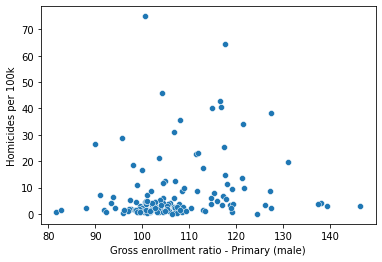

In [256]:
ax = sns.scatterplot(data=df, x="Value_y", y="Value_x")
ax.set(ylabel = "Homicides per 100k",xlabel = "Gross enrollment ratio - Primary (male)")



In [34]:
merged_2

,Num_x,Region,Year,Series_x,Value_x,Footnotes_x,Source_x,Num_y,Series_y,Value_y,Footnotes_y,Source_y
0,1.0,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,678920.8179,NaN,"United Nations Educational, Scientific and Cul...",1.0,"Intentional homicide rates per 100,000",6.2935,NaN,United Nations Office on Drugs and Crime (UNOD...
27,1.0,"Total, all countries or areas",2010,Students enrolled in primary education (thousa...,697001.1514,NaN,"United Nations Educational, Scientific and Cul...",1.0,"Intentional homicide rates per 100,000",6.0228,NaN,United Nations Office on Drugs and Crime (UNOD...
171,21.0,Northern America,2005,Students enrolled in primary education (thousa...,26759.2695,NaN,"United Nations Educational, Scientific and Cul...",21.0,"Intentional homicide rates per 100,000",5.3214,NaN,United Nations Office on Drugs and Crime (UNOD...
198,21.0,Northern America,2010,Students enrolled in primary education (thousa...,26565.4970,NaN,"United Nations Educational, Scientific and Cul...",21.0,"Intentional homicide rates per 100,000",4.4560,NaN,United Nations Office on Drugs and Crime (UNOD...
297,30.0,Eastern Asia,2005,Students enrolled in primary education (thousa...,126354.7561,Estimate.,"United Nations Educational, Scientific and Cul...",30.0,"Intentional homicide rates per 100,000",1.4588,NaN,United Nations Office on Drugs and Crime (UNOD...
...,...,...,...,...,...,...,...,...,...,...,...,...
22734,887.0,Yemen,2005,Students enrolled in primary education (thousa...,3219.5640,NaN,"United Nations Educational, Scientific and Cul...",887.0,"Intentional homicide rates per 100,000",4.6998,NaN,United Nations Office on Drugs and Crime (UNOD...
22761,887.0,Yemen,2010,Students enrolled in primary education (thousa...,3426.9910,NaN,"United Nations Educational, Scientific and Cul...",887.0,"Intentional homicide rates per 100,000",4.7463,NaN,United Nations Office on Drugs and Crime (UNOD...
22779,887.0,Yemen,2013,Students enrolled in primary education (thousa...,3874.7410,NaN,"United Nations Educational, Scientific and Cul...",887.0,"Intentional homicide rates per 100,000",6.7721,NaN,United Nations Office on Drugs and Crime (UNOD...
22794,894.0,Zambia,2010,Students enrolled in primary education (thousa...,2899.1310,NaN,"United Nations Educational, Scientific and Cul...",894.0,"Intentional homicide rates per 100,000",5.9827,NaN,United Nations Office on Drugs and Crime (UNOD...


In [28]:
import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline



# calculate the correlation matrix
corr = auto_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

ModuleNotFoundError: No module named 'pandas.rpy'